In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [3]:
#reading the .csv data file
data= pd.read_csv(r"C:\Users\mpkha\Desktop\VIT Course 2\project\project\seeds-less-rows.csv")

In [4]:
data.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,Kama wheat
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,Kama wheat
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,Kama wheat
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,Kama wheat
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132,Kama wheat


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
area                     42 non-null float64
perimeter                42 non-null float64
compactness              42 non-null float64
length                   42 non-null float64
width                    42 non-null float64
asymmetry_coefficient    42 non-null float64
groove_length            42 non-null float64
grain_variety            42 non-null object
dtypes: float64(7), object(1)
memory usage: 2.8+ KB


In [6]:
data.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
grain_variety            0
dtype: int64

In [7]:
data.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

In [8]:
data.shape

(42, 8)

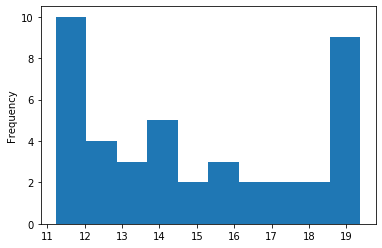

In [9]:
data['area'].plot.hist()

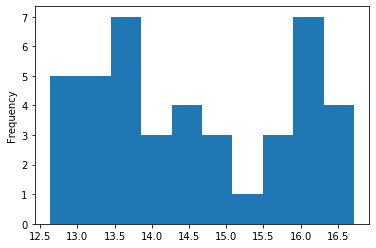

In [10]:
data['perimeter'].plot.hist()

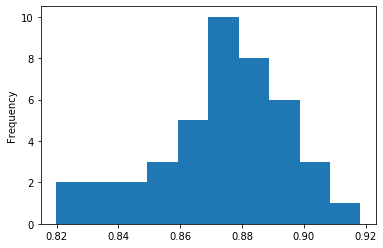

In [11]:
data['compactness'].plot.hist()

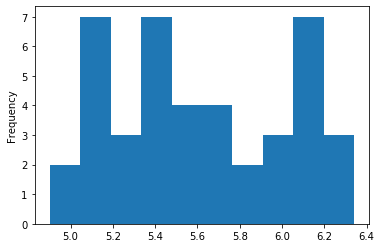

In [12]:
data['length'].plot.hist()

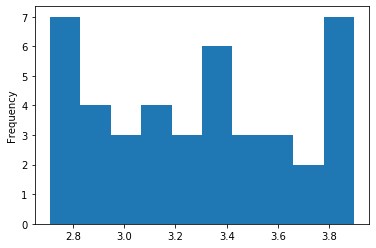

In [13]:
data['width'].plot.hist()

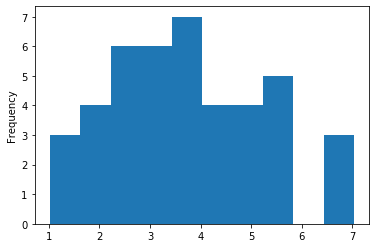

In [14]:
data['asymmetry_coefficient'].plot.hist()

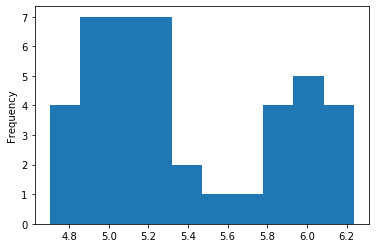

In [15]:
data['groove_length'].plot.hist()

In [16]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.923333,14.582619,0.873200,5.614214,3.278429,3.707095,5.396119
std,2.852972,1.289640,0.022442,0.418348,0.375864,1.521039,0.461898
min,11.230000,12.630000,0.819800,4.902000,2.710000,1.018000,4.703000
25%,12.445000,13.467500,0.860250,5.256750,2.927000,2.716500,5.013250
50%,14.400000,14.360000,0.875300,5.547500,3.296000,3.556000,5.223500
75%,17.832500,15.897500,0.885875,6.039750,3.571250,4.842250,5.878500
max,19.380000,16.720000,0.918300,6.341000,3.897000,7.035000,6.238000


In [17]:
data.corr()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
area,1.000000,0.994135,0.607557,0.952675,0.973153,-0.225056,0.864875
perimeter,0.994135,1.000000,0.525224,0.975333,0.947229,-0.197613,0.887507
compactness,0.607557,0.525224,1.000000,0.368664,0.755165,-0.384178,0.243071
length,0.952675,0.975333,0.368664,1.000000,0.869869,-0.137073,0.926179
width,0.973153,0.947229,0.755165,0.869869,1.000000,-0.264708,0.756668
asymmetry_coefficient,-0.225056,-0.197613,-0.384178,-0.137073,-0.264708,1.000000,-0.024300
groove_length,0.864875,0.887507,0.243071,0.926179,0.756668,-0.024300,1.000000


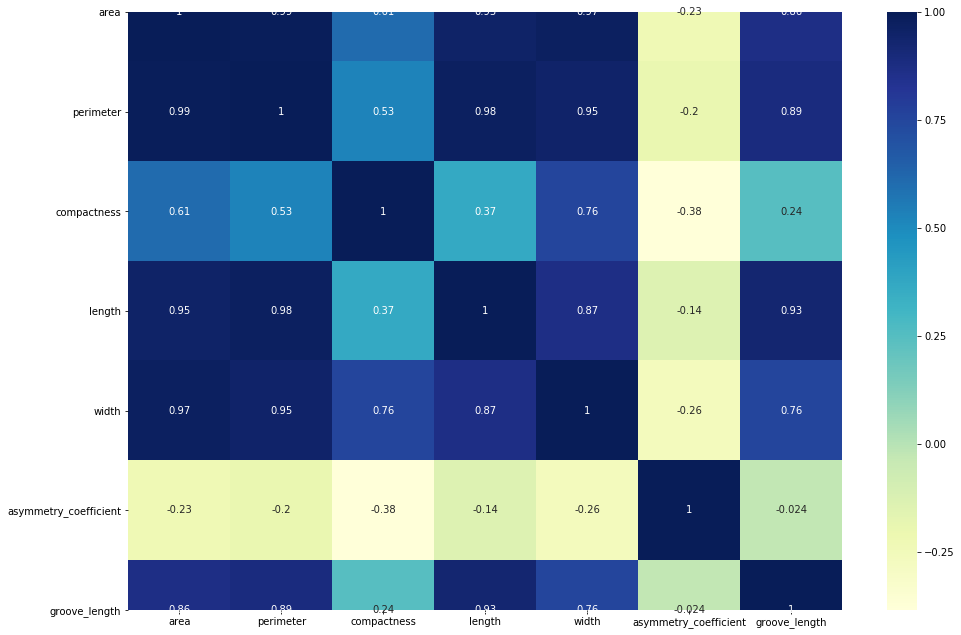

In [18]:
plt.subplots(figsize=(16,11))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

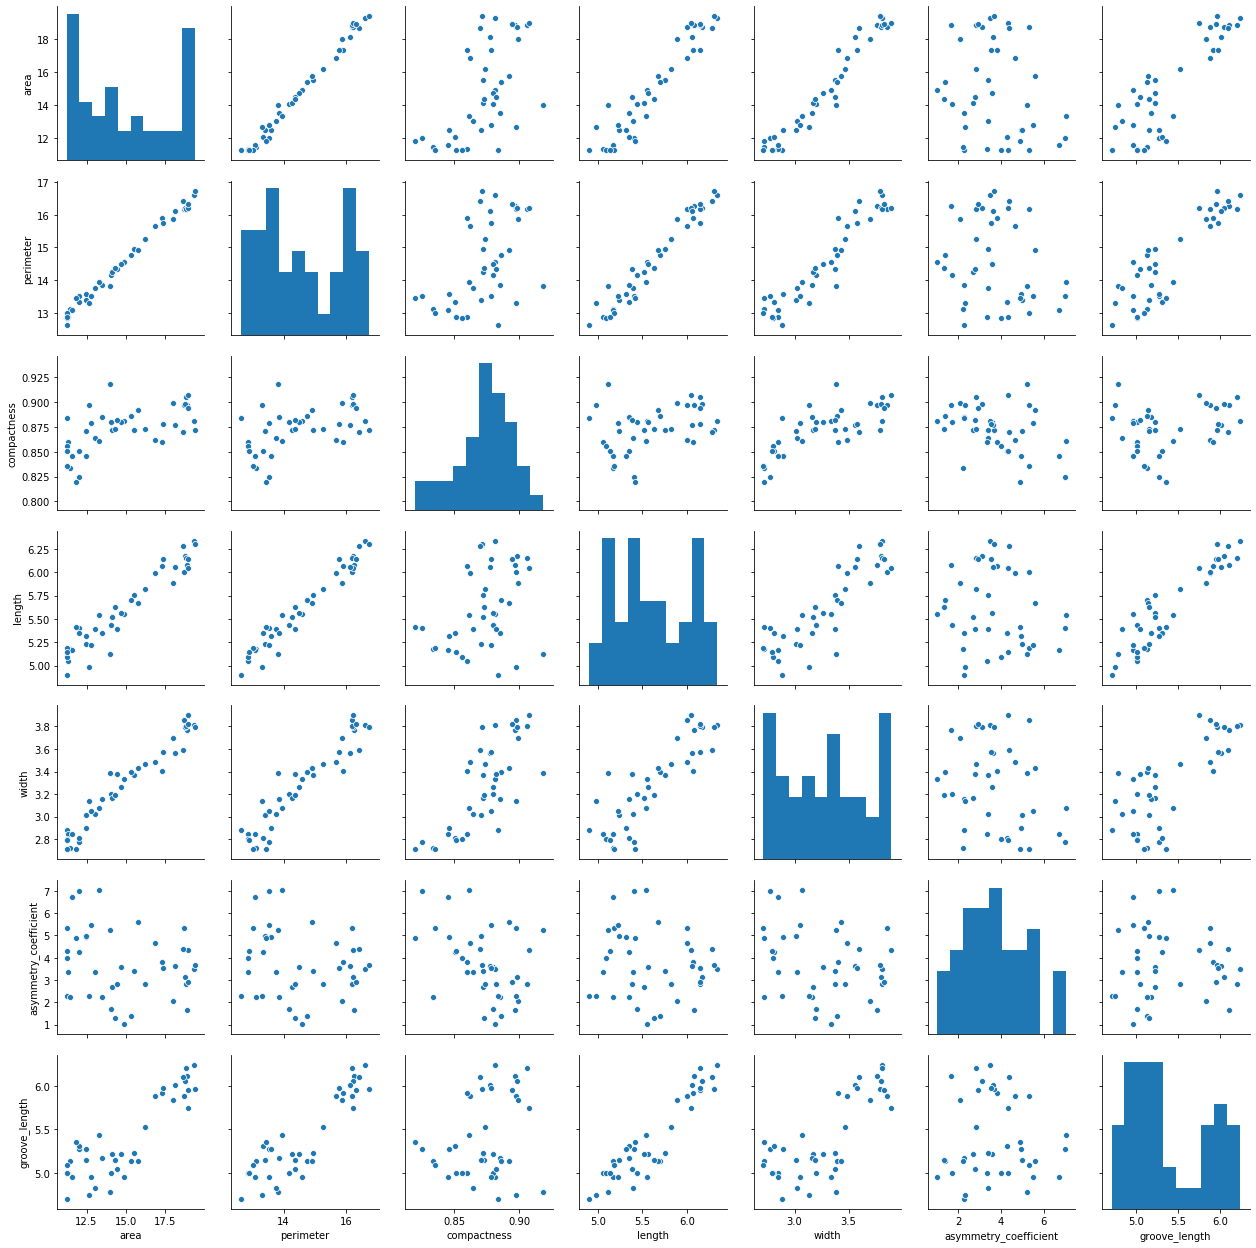

In [19]:
sns.pairplot(data)

In [20]:
data["grain_variety"].value_counts()

Canadian wheat    14
Rosa wheat        14
Kama wheat        14
Name: grain_variety, dtype: int64

In [21]:
data["grain_variety"].replace("Rosa wheat",0,inplace=True)
data["grain_variety"].replace("Canadian wheat",1,inplace=True)
data["grain_variety"].replace("Kama wheat",2,inplace=True)

In [22]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.923333,14.582619,0.873200,5.614214,3.278429,3.707095,5.396119,1.000000
std,2.852972,1.289640,0.022442,0.418348,0.375864,1.521039,0.461898,0.826394
min,11.230000,12.630000,0.819800,4.902000,2.710000,1.018000,4.703000,0.000000
25%,12.445000,13.467500,0.860250,5.256750,2.927000,2.716500,5.013250,0.000000
50%,14.400000,14.360000,0.875300,5.547500,3.296000,3.556000,5.223500,1.000000
75%,17.832500,15.897500,0.885875,6.039750,3.571250,4.842250,5.878500,2.000000
max,19.380000,16.720000,0.918300,6.341000,3.897000,7.035000,6.238000,2.000000


# LR

In [23]:
X=data.iloc[:,[0,1,2,3,4,5,6]]

In [24]:
Y=data.iloc[:,[7]]
Y

,grain_variety
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [25]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=2)

In [26]:
log1=LogisticRegression()

In [27]:
log1.fit(trainX,trainY)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
log1.coef_

array([[ 1.58980219, -1.25143762, -0.22618716, -0.57588207, -0.33107968,
        -0.35921418, -0.16485468],
       [-1.22257201,  0.5355292 ,  0.08808571,  0.31291354, -0.01456209,
         0.76332516,  0.70597443],
       [-0.41104708,  0.75972967,  0.16236694,  0.14147589,  0.4386126 ,
        -0.4639186 , -1.17660758]])

In [29]:
pred01=log1.predict_proba(testX)
pred01

array([[0.69422556, 0.02502355, 0.28075089],
       [0.38333157, 0.01220106, 0.60446737],
       [0.57682624, 0.12579936, 0.2973744 ],
       [0.32416928, 0.01268058, 0.66315014],
       [0.19828089, 0.05901725, 0.74270185],
       [0.00306081, 0.87597022, 0.12096898],
       [0.23212727, 0.03838349, 0.72948925],
       [0.00487649, 0.76368145, 0.23144206],
       [0.7237191 , 0.00090232, 0.27537859],
       [0.00704206, 0.66092396, 0.33203398],
       [0.01983489, 0.72232682, 0.25783829],
       [0.0124163 , 0.46904726, 0.51853643],
       [0.77152998, 0.01108039, 0.21738963]])

In [30]:
pred02=log1.predict(X) # pedicting the values of x
pred02

array([2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
      dtype=int64)

In [31]:
data["predict01"]=pred02
data

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety,predict01
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2,2
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,2,2
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2,2
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,2,1
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,2,2
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,2,2
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,2,2
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,2,0
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,2,2
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132,2,2


In [32]:
CM=confusion_matrix(Y,pred02)
CM

array([[14,  0,  0],
       [ 0, 12,  2],
       [ 1,  1, 12]], dtype=int64)

In [33]:
acc_log1=accuracy_score(pred02,Y)
acc_log1

0.9047619047619048

# NB

In [34]:
features = data.columns[0:7]
cols= data.columns
labels = cols[7]
print(features, "\n\n", labels)

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length'],
      dtype='object') 

 grain_variety


In [35]:
for feature in features:
    data[feature] = (data[features]- data[features].mean()) / data[features].std()

In [36]:
data.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety,predict01
0,-0.015189,-0.015189,-0.015189,-0.015189,-0.015189,-0.015189,-0.015189,2,2
1,-0.081786,-0.081786,-0.081786,-0.081786,-0.081786,-0.081786,-0.081786,2,2
2,-0.313124,-0.313124,-0.313124,-0.313124,-0.313124,-0.313124,-0.313124,2,2
3,-0.327144,-0.327144,-0.327144,-0.327144,-0.327144,-0.327144,-0.327144,2,1
4,-0.285083,-0.285083,-0.285083,-0.285083,-0.285083,-0.285083,-0.285083,2,2
5,-0.667141,-0.667141,-0.667141,-0.667141,-0.667141,-0.667141,-0.667141,2,2
6,0.198623,0.198623,0.198623,0.198623,0.198623,0.198623,0.198623,2,2
7,0.447487,0.447487,0.447487,0.447487,0.447487,0.447487,0.447487,2,0
8,-0.498895,-0.498895,-0.498895,-0.498895,-0.498895,-0.498895,-0.498895,2,2
9,0.153057,0.153057,0.153057,0.153057,0.153057,0.153057,0.153057,2,2


In [37]:
#splitting the data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [38]:
#fitting the model
model01= GaussianNB()
model01.fit(X_train,Y_train)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
pred01=model01.predict(X_train)
pred01

array([1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 0, 1], dtype=int64)

In [40]:
#calculating the accuracy of the  training model
print("Accuracy= ",accuracy_score(pred01,Y_train))

Accuracy=  0.9655172413793104


In [41]:
pred02=model01.predict(X_test)
pred02

array([2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0], dtype=int64)

In [42]:
#printing accuracy of the testing model
print("Accuracy= ",accuracy_score(pred02,Y_test))

Accuracy=  0.8461538461538461


In [43]:
pred03=model01.predict(X)
pred03

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [44]:
acc_NB1=accuracy_score(pred03,Y)

In [45]:
# accuracy of the entire data set
print("Accuracy= ",accuracy_score(pred03,Y))

Accuracy=  0.9285714285714286


# DT

In [46]:
#reading the .csv data file
data= pd.read_csv(r"C:\Users\mpkha\Desktop\VIT Course 2\project\project\seeds-less-rows.csv")

In [47]:
data["grain_variety"].replace("Rosa wheat",0,inplace=True)
data["grain_variety"].replace("Canadian wheat",1,inplace=True)
data["grain_variety"].replace("Kama wheat",2,inplace=True)

In [48]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.923333,14.582619,0.873200,5.614214,3.278429,3.707095,5.396119,1.000000
std,2.852972,1.289640,0.022442,0.418348,0.375864,1.521039,0.461898,0.826394
min,11.230000,12.630000,0.819800,4.902000,2.710000,1.018000,4.703000,0.000000
25%,12.445000,13.467500,0.860250,5.256750,2.927000,2.716500,5.013250,0.000000
50%,14.400000,14.360000,0.875300,5.547500,3.296000,3.556000,5.223500,1.000000
75%,17.832500,15.897500,0.885875,6.039750,3.571250,4.842250,5.878500,2.000000
max,19.380000,16.720000,0.918300,6.341000,3.897000,7.035000,6.238000,2.000000


In [49]:
colnames = list(data.columns)

In [50]:
colnames #Getting column names

['area',
 'perimeter',
 'compactness',
 'length',
 'width',
 'asymmetry_coefficient',
 'groove_length',
 'grain_variety']

In [51]:
Predictors = colnames[0:7] 
target = colnames[7]
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.923333,14.582619,0.873200,5.614214,3.278429,3.707095,5.396119,1.000000
std,2.852972,1.289640,0.022442,0.418348,0.375864,1.521039,0.461898,0.826394
min,11.230000,12.630000,0.819800,4.902000,2.710000,1.018000,4.703000,0.000000
25%,12.445000,13.467500,0.860250,5.256750,2.927000,2.716500,5.013250,0.000000
50%,14.400000,14.360000,0.875300,5.547500,3.296000,3.556000,5.223500,1.000000
75%,17.832500,15.897500,0.885875,6.039750,3.571250,4.842250,5.878500,2.000000
max,19.380000,16.720000,0.918300,6.341000,3.897000,7.035000,6.238000,2.000000


In [52]:
train, test = train_test_split(data, test_size= 0.5)

In [53]:
model01 =  DecisionTreeClassifier(criterion="entropy")

In [54]:
model01.fit(train[Predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
pred01 = model01.predict(test[Predictors])
pd.crosstab(test[target], pred01)

col_0,0,1,2
grain_variety,,,
0,7,0,0
1,0,4,0
2,1,2,7


In [56]:
acc_decisiontree1 = (8+5+6)/(8+5+6+1)
acc_decisiontree1

0.95

# SVM

In [57]:
# Importing all required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score # score evaluate
from sklearn.model_selection import cross_val_predict 
%matplotlib inline

In [58]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.923333,14.582619,0.873200,5.614214,3.278429,3.707095,5.396119,1.000000
std,2.852972,1.289640,0.022442,0.418348,0.375864,1.521039,0.461898,0.826394
min,11.230000,12.630000,0.819800,4.902000,2.710000,1.018000,4.703000,0.000000
25%,12.445000,13.467500,0.860250,5.256750,2.927000,2.716500,5.013250,0.000000
50%,14.400000,14.360000,0.875300,5.547500,3.296000,3.556000,5.223500,1.000000
75%,17.832500,15.897500,0.885875,6.039750,3.571250,4.842250,5.878500,2.000000
max,19.380000,16.720000,0.918300,6.341000,3.897000,7.035000,6.238000,2.000000


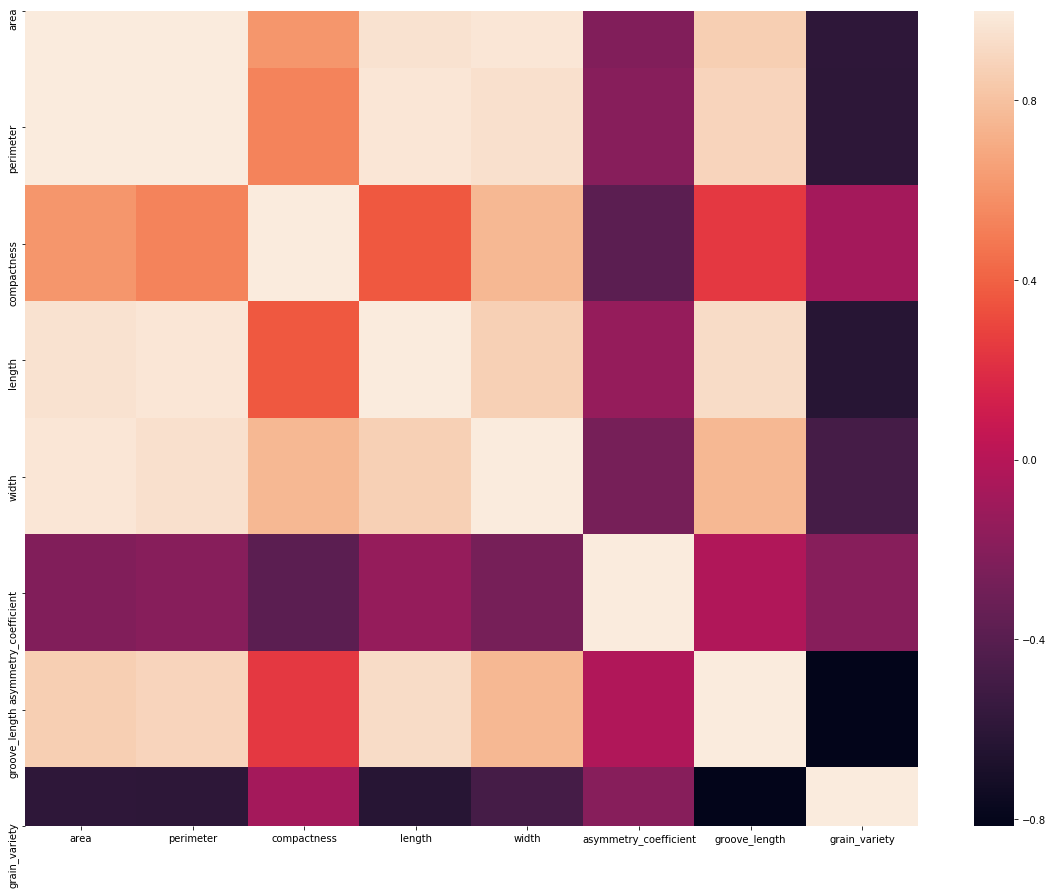

In [59]:
plt.subplots(figsize=(20,15)) # Plotting heatmap
sns.heatmap(data.corr())

In [60]:
from sklearn.svm import SVC

In [61]:
data.describe

<bound method NDFrame.describe of      area  perimeter  compactness  length  width  asymmetry_coefficient  \
0   14.88      14.57       0.8811   5.554  3.333                  1.018   
1   14.69      14.49       0.8799   5.563  3.259                  3.586   
2   14.03      14.16       0.8796   5.438  3.201                  1.717   
3   13.99      13.83       0.9183   5.119  3.383                  5.234   
4   14.11      14.26       0.8722   5.520  3.168                  2.688   
5   13.02      13.76       0.8641   5.395  3.026                  3.373   
6   15.49      14.94       0.8724   5.757  3.371                  3.412   
7   16.20      15.27       0.8734   5.826  3.464                  2.823   
8   13.50      13.85       0.8852   5.351  3.158                  2.249   
9   15.36      14.76       0.8861   5.701  3.393                  1.367   
10  15.78      14.91       0.8923   5.674  3.434                  5.593   
11  14.46      14.35       0.8818   5.388  3.377                  

In [62]:
features=data.drop("grain_variety", axis=1)
target = data["grain_variety"]

In [63]:
X_train,X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.3, random_state = 5) 
print(X_train.shape," \n\n\n", X_test.shape)

(29, 7)  


 (13, 7)


In [64]:
model01 = SVC()
model01.fit(X_train,Y_train)
pred01 = model01.predict(X_train)
accuracy_score(Y_train,pred01)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9310344827586207

In [65]:
confusion_matrix(Y_train,pred01)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  7]], dtype=int64)

In [66]:
pd.crosstab(Y_train,pred01)

col_0,0,1,2
grain_variety,,,
0,11,0,0
1,0,9,1
2,0,1,7


In [67]:
X_train.shape

(29, 7)

In [68]:
acc_svm1 = (11+9+7)/(11+9+7+1+1)
acc_svm1

0.9310344827586207

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNC #importing KNC library for KNN Algorithm

In [70]:
#Taking the initial rows from the dataset
data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,2
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,2
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,2


In [71]:
#Getting info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
area                     42 non-null float64
perimeter                42 non-null float64
compactness              42 non-null float64
length                   42 non-null float64
width                    42 non-null float64
asymmetry_coefficient    42 non-null float64
groove_length            42 non-null float64
grain_variety            42 non-null int64
dtypes: float64(7), int64(1)
memory usage: 2.8 KB


In [72]:
#Getting the total entries of the dataset
data.shape

(42, 8)

In [73]:
#The last entries of the dataset
data.tail()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
37,11.81,13.45,0.8198,5.413,2.716,4.898,5.352,1
38,11.27,12.86,0.8563,5.091,2.804,3.985,5.001,1
39,12.79,13.53,0.8786,5.224,3.054,5.483,4.958,1
40,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,1
41,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1


In [74]:
#Splitting the data into train and test with test size 0.3
train, test = train_test_split(data,test_size=0.3)

In [75]:
#Dropping the dependent variables for evaluation and storing in 1 column
trainX  = train.drop(["grain_variety"],axis=1)
trainY = train["grain_variety"]

testX = test.drop(["grain_variety"], axis=1)
testY = test["grain_variety"]

In [76]:
#Building and fitting the model for KNN for inflamation
model01 = KNC (n_neighbors=3)
model01.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [77]:
#Predicting the model
pred01= model01.predict(trainX)

In [78]:
#Taking the average of prediction
train_acc = np.mean(pred01 == trainY)

In [79]:
#Checking the accuracy, here the accuracy is 1 because of the dataset being small
train_acc

0.9655172413793104

In [80]:
#predicting for testing dataset
pred02 = model01.predict(testX)
test_acc = np.mean(pred02== testY)
test_acc

0.9230769230769231

In [81]:
#Similarly doing the prediction and model fitting with changed K value
model02 = KNC (n_neighbors = 5)
model02.fit(trainX,trainY)
pred03= model02.predict(trainX)
train_acc = np.mean(pred03 == trainY)
pred04 = model02.predict(testX)
test_acc = np.mean(pred04== testY)

print(train_acc,"\n",test_acc)
acc_KNN1= (train_acc+test_acc)/2
acc_KNN1

0.9655172413793104 
 0.8461538461538461


0.9058355437665783

In [82]:
#Creating a list for storing accuracy
acc=[]
for i in range(3,20,2):
    model = KNC(n_neighbors=i)
    model.fit(trainX, trainY)
    train_acc = np.mean(pred03 == trainY)
    test_acc = np.mean(pred04== testY)
    acc.append([train_acc, test_acc]) #appending the training and testing accuracy

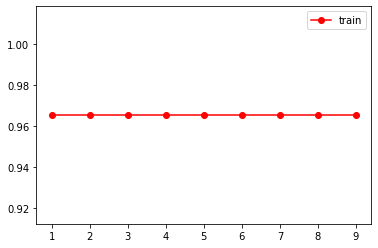

In [83]:
#plotting the graph of training accuracy
plt.plot(np.arange(1,10,1),[i[0] for i in acc], "ro-")
plt.legend(["train", "test"])

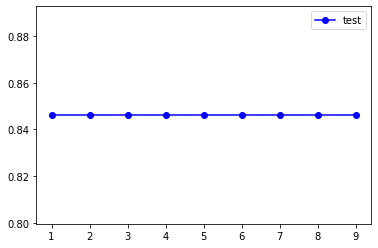

In [84]:
#plotting the graph of testing accuracy
plt.plot(np.arange(1,10,1),[i[1] for i in acc], "bo-")
plt.legend(["test", "train"])

# model assesment

In [85]:
models_grainvariety= pd.DataFrame({ 
"Model" : ["Logistic Regression", "Naive Bayes", "Decision Tree", "Support Vector Machine" , "KNN"],
"FullScore" : [acc_log1,acc_NB1,acc_decisiontree1,acc_svm1,acc_KNN1]
})

In [86]:
models_grainvariety.head()

,Model,FullScore
0,Logistic Regression,0.904762
1,Naive Bayes,0.928571
2,Decision Tree,0.950000
3,Support Vector Machine,0.931034
4,KNN,0.905836
